In [ ]:
# Install necessary libraries if not already installed
!pip install nltk
!pip install scikit-learn


# **Select a NLP Task : Sentiment Analysis**

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')

# Check the first few rows
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# **Data Preprocessing**

In [7]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download stopwords
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')

# Check the first few rows
print(df.head())

# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

# Apply the clean_text function to the reviews
df['cleaned_review'] = df['review'].apply(clean_text)

# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = text.split()  # Simple tokenization by splitting
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

df['cleaned_review'] = df['cleaned_review'].apply(tokenize_and_remove_stopwords)

# Print cleaned and tokenized data
print(df['cleaned_review'].head())

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X_tfidf = tfidf.fit_transform(df['cleaned_review']).toarray()

# Print the shape of the TF-IDF matrix
print("Shape of the TF-IDF matrix:", X_tfidf.shape)

# Display the first 5 TF-IDF vectors
print(X_tfidf[:5])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production br br filming tech...
2    thought wonderful way spend time hot summer we...
3    basically family little boy jake thinks zombie...
4    petter mattei love time money visually stunnin...
Name: cleaned_review, dtype: object
Shape of the TF-IDF matrix: (50000, 5000)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.06217595 ... 0.22779341 

# **Model Selection**

## Traditional Machine Learning Models (TF-IDF + Classifier)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Download stopwords
nltk.download('stopwords')

# Load the dataset (ensure the file path is correct)
df = pd.read_csv('/content/IMDB Dataset.csv')

# Check the first few rows
print(df.head())

# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'\W', ' ', text)

    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

# Apply the clean_text function to the reviews
df['cleaned_review'] = df['review'].apply(clean_text)

# Tokenization and stopword removal
stop_words = set(stopwords.words('english'))

def tokenize_and_remove_stopwords(text):
    tokens = text.split()  # Simple tokenization by splitting
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

df['cleaned_review'] = df['cleaned_review'].apply(tokenize_and_remove_stopwords)

# Now, Tokenization using Keras tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_review'])  # Ensure df is defined here
X_seq = tokenizer.texts_to_sequences(df['cleaned_review'])

# Padding sequences to ensure equal length
X_padded = pad_sequences(X_seq, maxlen=200)

# Encode labels (for binary sentiment classification)
y = pd.get_dummies(df['sentiment']).values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 287s 454ms/step - accuracy: 0.7891 - loss: 0.4459 - val_accuracy: 0.8685 - val_loss: 0.3183
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 281s 450ms/step - accuracy: 0.8485 - loss: 0.3526 - val_accuracy: 0.8737 - val_loss: 0.3210
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 325s 456ms/step - accuracy: 0.9015 - loss: 0.2525 - val_accuracy: 0.8800 - val_loss: 0.2864
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 316s 446ms/step - accuracy: 0.9176 - loss: 0.2119 - val_accuracy: 0.8810 - val_loss: 0.2886
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 324s 449ms/step - accuracy: 0.9280 - loss: 0.1847 - val_accuracy: 0.8797 - val_loss: 0.3118
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8765 - loss: 0.3153
Test Accuracy: 87.97%


# **Model Evaluation**

313/313 ━━━━━━━━━━━━━━━━━━━━ 54s 172ms/step
Accuracy: 87.97%
Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.89      0.88      4961
    Positive       0.89      0.87      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



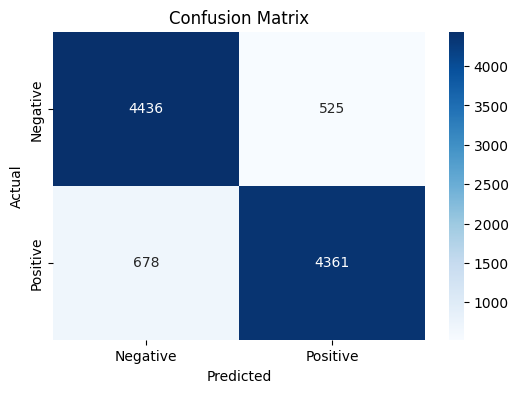

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test)

# Since the model outputs probabilities, convert them to class labels
y_pred_labels = [1 if pred[1] > 0.5 else 0 for pred in y_pred]

# Convert y_test from one-hot encoding to single labels
y_test_labels = [1 if label[1] == 1 else 0 for label in y_test]

# Accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report (Precision, Recall, F1-score)
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=['Negative', 'Positive']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


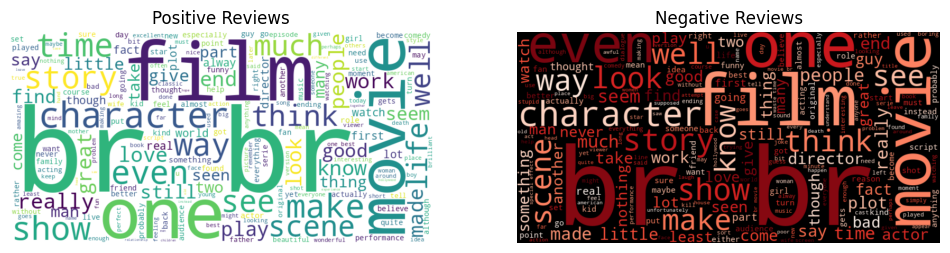

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the reviews for each sentiment
positive_reviews = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])
negative_reviews = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])

# Generate word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()


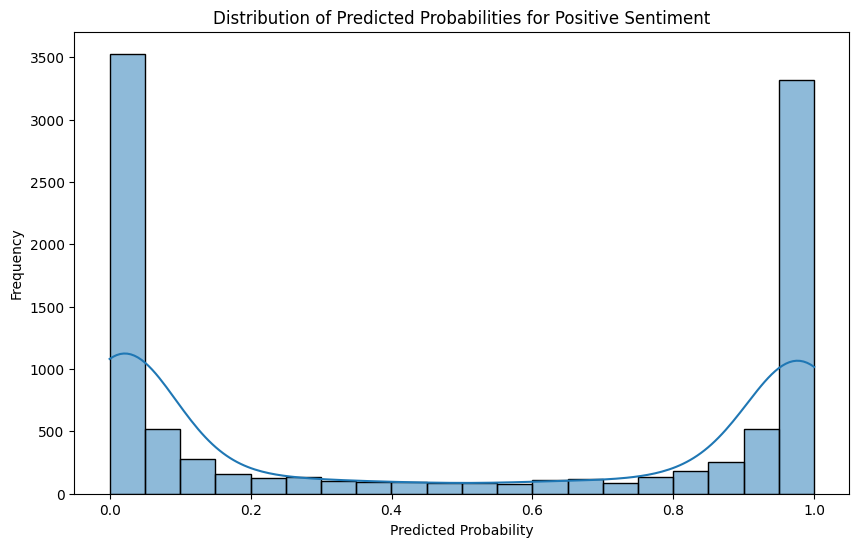

In [9]:
import seaborn as sns

# Get predicted probabilities for the positive class
y_pred_probs = [pred[1] for pred in y_pred]

# Plot the distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_probs, bins=20, kde=True)
plt.title('Distribution of Predicted Probabilities for Positive Sentiment')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


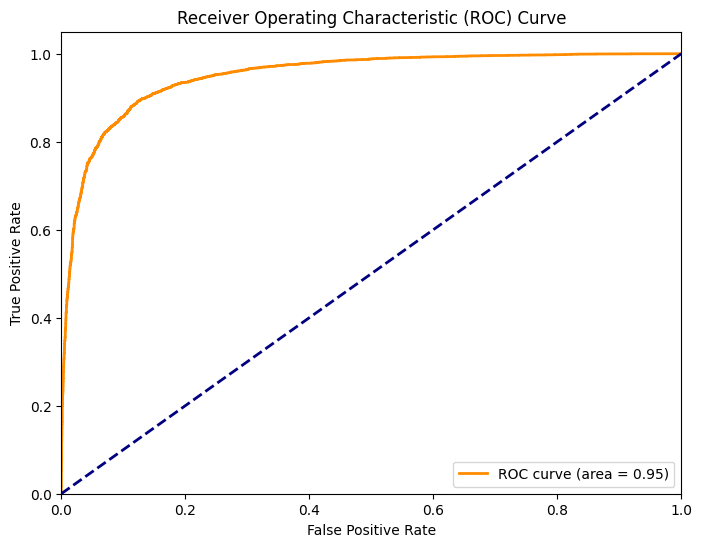

In [10]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_labels, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
